# Pleasant Lake Example

* **[View the configuration file(s)](https://aleaf.github.io/modflow-setup/config-file-gallery.html#pleasant-lake-test-case)** 
* **[Run this example](https://mybinder.org/v2/gh/aleaf/modflow-setup/develop?urlpath=lab/tree/examples)  on  [Binder](https://mybinder.org/)**

#### Model details
* MODFLOW-6 model with local grid refinement (LGR)
* LGR parent model is itself a Telescopic Mesh Refinment (TMR) inset from a MODFLOW-NWT model
* Layer 1 in TMR parent model is subdivided evenly into two layers in LGR model (``botm: from_parent: 0: -0.5``). Other layers mapped explicitly between TMR parent and LGR model.
* starting heads from LGR parent model resampled from binary output from the TMR parent
* rch, npf, sto, and wel input copied from parent model
* SFR package constructed from an NHDPlus v2 dataset (path to NHDPlus files in the same structure as the `downloads from the NHDPlus website`_)
* head observations from csv files with different column names
* LGR inset extent based on a buffer distance around a feature of interest
* LGR inset dis, ic, npf, sto and rch packages copied from LGR parent
* WEL package created from custom format
* Lake package created from polygon features, bathymetry raster, stage-area-volume file and climate data from `PRISM`_.
* Lake package observations set up automatically (output file for each lake)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import flopy
import flopy.utils.binaryfile as bf
from mfsetup import MF6model
from mfsetup.discretization import cellids_to_kij
from gisutils import df2shp
import mfexport

flopy is installed in /Users/aleaf/Documents/GitHub/flopy/flopy


In [2]:
m = MF6model.setup_from_yaml('pleasant_lgr_parent.yml')

loading configuration file pleasant_lgr_parent.yml...

Setting up plsnt_lgr_parent model from data in None

sim_name: pleasant_lgr
version: mf6
exe_name: mf6
sim_ws: /Users/aleaf/Documents/GitHub/modflow-setup/examples/pleasant_lgr
modelname: plsnt_lgr_parent
version: mf6
simulation: sim_name = pleasant_lgr
sim_path = /Users/aleaf/Documents/GitHub/modflow-setup/examples/pleasant_lgr
exe_name = mf6

###################
Package mfsim.nam
###################

package_name = mfsim.nam
filename = mfsim.nam
package_type = nam
model_or_simulation_package = simulation
simulation_name = pleasant_lgr



list: /Users/aleaf/Documents/GitHub/modflow-setup/examples/pleasant_lgr/plsnt_lgr_parent.list
print_input: True
print_flows: False
save_flows: True
newtonoptions: ['under_relaxation']
model_ws: /Users/aleaf/Documents/GitHub/modflow-setup/examples/data/pleasant
version: mfnwt
f: pleasant.nam
load_only: ['upw', 'rch', 'oc', 'sfr', 'dis', 'bas6', 'wel']
loading parent model /Users/aleaf/Documents/Gi

finished in 0.03s

wrote original/plsnt_lgr_parent_lakarr0.dat, took 0.00s
wrote original/plsnt_lgr_parent_lakarr1.dat, took 0.00s
wrote original/plsnt_lgr_parent_lakarr2.dat, took 0.00s
wrote original/plsnt_lgr_parent_lakarr3.dat, took 0.00s
wrote original/plsnt_lgr_parent_lakarr4.dat, took 0.00s
wrote ./external/plsnt_lgr_parent_idomain0.dat, took 0.00s
wrote ./external/plsnt_lgr_parent_idomain1.dat, took 0.00s
wrote ./external/plsnt_lgr_parent_idomain2.dat, took 0.00s
wrote ./external/plsnt_lgr_parent_idomain3.dat, took 0.00s
wrote ./external/plsnt_lgr_parent_idomain4.dat, took 0.00s
finished in 0.29s

rotation: 0
snap_to_NHG: False
dxy: 40
buffer: 1000
grid_file: /Users/aleaf/Documents/GitHub/modflow-setup/examples/pleasant_lgr/plsnt_lgr_inset_grid.json
epsg: 3070
nlay: 5
id_column: HYDROID
include_ids: [600059060]
features_shapefile: /Users/aleaf/Documents/GitHub/modflow-setup/examples/data/pleasant/source_data/shps/all_lakes.shp
parent_model: start_date_time: 2012-01-01
nper: 1
s


loading NHDPlus v2 hydrography data...
for basins:
/Users/aleaf/Documents/GitHub/modflow-setup/examples/data/pleasant/source_data/shps

reading /Users/aleaf/Documents/GitHub/modflow-setup/examples/data/pleasant/source_data/shps/NHDSnapshot/Hydrography/NHDFlowline.shp...
filtering on bounding box -89.5911225596923, 43.96595988223436, -89.52843935935044, 44.01121639579922...
--> building dataframe... (may take a while for large shapefiles)

reading /Users/aleaf/Documents/GitHub/modflow-setup/examples/data/pleasant/source_data/shps/NHDPlusAttributes/PlusFlowlineVAA.dbf...
--> building dataframe... (may take a while for large shapefiles)

reading /Users/aleaf/Documents/GitHub/modflow-setup/examples/data/pleasant/source_data/shps/NHDPlusAttributes/PlusFlow.dbf...
--> building dataframe... (may take a while for large shapefiles)

reading /Users/aleaf/Documents/GitHub/modflow-setup/examples/data/pleasant/source_data/shps/NHDPlusAttributes/elevslope.dbf...
--> building dataframe... (may take 

stress_period_data: {0: {'filename': './external/plsnt_lgr_parent_chd_000.dat'},
 1: {'filename': './external/plsnt_lgr_parent_chd_001.dat'},
 2: {'filename': './external/plsnt_lgr_parent_chd_002.dat'},
 3: {'filename': './external/plsnt_lgr_parent_chd_003.dat'},
 4: {'filename': './external/plsnt_lgr_parent_chd_004.dat'},
 5: {'filename': './external/plsnt_lgr_parent_chd_005.dat'},
 6: {'filename': './external/plsnt_lgr_parent_chd_006.dat'},
 7: {'filename': './external/plsnt_lgr_parent_chd_007.dat'},
 8: {'filename': './external/plsnt_lgr_parent_chd_008.dat'},
 9: {'filename': './external/plsnt_lgr_parent_chd_009.dat'},
 10: {'filename': './external/plsnt_lgr_parent_chd_010.dat'},
 11: {'filename': './external/plsnt_lgr_parent_chd_011.dat'},
 12: {'filename': './external/plsnt_lgr_parent_chd_012.dat'}}
print_input: False
print_flows: False
save_flows: True
finished in 5.71s


Setting up DIS package...
length_units: meters
filenames: {0: '/Users/aleaf/Documents/GitHub/modflow-setup/ex

filtering on bounding box 552800.0, 388200.0, 557800.0, 393200.0...
--> building dataframe... (may take a while for large shapefiles)
delr: [40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0]
delc: [40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,


wrote ./external/plsnt_lgr_inset_rch0.dat, took 0.00s
wrote ./external/plsnt_lgr_inset_rch1.dat, took 0.00s
wrote ./external/plsnt_lgr_inset_rch2.dat, took 0.00s
wrote ./external/plsnt_lgr_inset_rch3.dat, took 0.00s
wrote ./external/plsnt_lgr_inset_rch4.dat, took 0.00s
wrote ./external/plsnt_lgr_inset_rch5.dat, took 0.00s
wrote ./external/plsnt_lgr_inset_rch6.dat, took 0.00s
wrote ./external/plsnt_lgr_inset_rch7.dat, took 0.00s
wrote ./external/plsnt_lgr_inset_rch8.dat, took 0.00s
wrote ./external/plsnt_lgr_inset_rch9.dat, took 0.00s
wrote ./external/plsnt_lgr_inset_rch10.dat, took 0.00s
wrote ./external/plsnt_lgr_inset_rch11.dat, took 0.00s
wrote ./external/plsnt_lgr_inset_rch12.dat, took 0.00s
recharge: {0: {'filename': './external/plsnt_lgr_inset_rch0.dat'},
 1: {'filename': './external/plsnt_lgr_inset_rch1.dat'},
 2: {'filename': './external/plsnt_lgr_inset_rch2.dat'},
 3: {'filename': './external/plsnt_lgr_inset_rch3.dat'},
 4: {'filename': './external/plsnt_lgr_inset_rch4.dat'},


computing cell thicknesses...
finished in 0.28s


reading /Users/aleaf/Documents/GitHub/modflow-setup/examples/data/pleasant/source_data/shps/csls_sources_wu_pts.shp...
--> building dataframe... (may take a while for large shapefiles)
intersecting wells with model grid...
getting i, j locations...
finished in 0.00s

took 0.00s

computing cell thicknesses...
finished in 0.28s


Resampling pumping rates in /Users/aleaf/Documents/GitHub/modflow-setup/examples/data/pleasant/source_data/tables/master_wu.csv to model stress periods...
    wells with no data for a stress period will be assigned 0.0 pumping rates.
took 0.02s

stress_period_data: {0: {'filename': './external/plsnt_lgr_inset_wel_000.dat'},
 1: {'filename': './external/plsnt_lgr_inset_wel_001.dat'},
 2: {'filename': './external/plsnt_lgr_inset_wel_002.dat'},
 3: {'filename': './external/plsnt_lgr_inset_wel_003.dat'},
 4: {'filename': './external/plsnt_lgr_inset_wel_004.dat'},
 5: {'filename': './external/plsnt_lgr_inset_wel_005.d

finished setting up model in 19.69s

plsnt_lgr_parent model:
5 layer(s), 25 row(s), 25 column(s), 13 stress period(s)
Parent model: /Users/aleaf/Documents/GitHub/modflow-setup/examples/data/pleasant/pleasant
CRS: epsg:3070
(epsg: 3070)
Bounds: (552800.0, 557800.0, 388200.0, 393200.0)
Grid spacing: 200.00 meters
Packages: dis ic npf sto rcha oc sfr_0 wel_0 obs_0 chd_0


In [3]:
m

plsnt_lgr_parent model:
5 layer(s), 25 row(s), 25 column(s), 13 stress period(s)
Parent model: /Users/aleaf/Documents/GitHub/modflow-setup/examples/data/pleasant/pleasant
CRS: epsg:3070
(epsg: 3070)
Bounds: (552800.0, 557800.0, 388200.0, 393200.0)
Grid spacing: 200.00 meters
Packages: dis ic npf sto rcha oc sfr_0 wel_0 obs_0 chd_0

In [4]:
m.cfg.keys()

dict_keys(['simulation', 'model', 'parent', 'intermediate_data', 'postprocessing', 'setup_grid', 'dis', 'tdis', 'ic', 'npf', 'sto', 'rch', 'sfr', 'lak', 'mvr', 'wel', 'chd', 'oc', 'obs', 'ims', 'filename', 'ghb', 'maw', 'external_files', 'grid'])

In [5]:
m.cfg['dis']

defaultdict(dict,
            {'options': {'length_units': 'meters'},
             'dimensions': {'nlay': 5},
             'griddata': {'top': [{'filename': './external/plsnt_lgr_parent_top.dat'}],
              'botm': [{'filename': './external/plsnt_lgr_parent_botm0.dat'},
               {'filename': './external/plsnt_lgr_parent_botm1.dat'},
               {'filename': './external/plsnt_lgr_parent_botm2.dat'},
               {'filename': './external/plsnt_lgr_parent_botm3.dat'},
               {'filename': './external/plsnt_lgr_parent_botm4.dat'}],
              'idomain': [{'filename': './external/plsnt_lgr_parent_idomain0.dat'},
               {'filename': './external/plsnt_lgr_parent_idomain1.dat'},
               {'filename': './external/plsnt_lgr_parent_idomain2.dat'},
               {'filename': './external/plsnt_lgr_parent_idomain3.dat'},
               {'filename': './external/plsnt_lgr_parent_idomain4.dat'}]},
             'top_filename_fmt': 'top.dat',
             'botm_fi

In [6]:
m.inset

{'plsnt_lgr_inset': plsnt_lgr_inset model:
 5 layer(s), 70 row(s), 80 column(s), 13 stress period(s)
 Parent model: ./plsnt_lgr_parent
 CRS: epsg:3070
 (epsg: 3070)
 Bounds: (554200.0, 557400.0, 389000.0, 391800.0)
 Grid spacing: 40.00 meters
 Packages: dis ic npf sto rcha oc sfr_0 lak_0 obs_0 wel_0 obs_1}

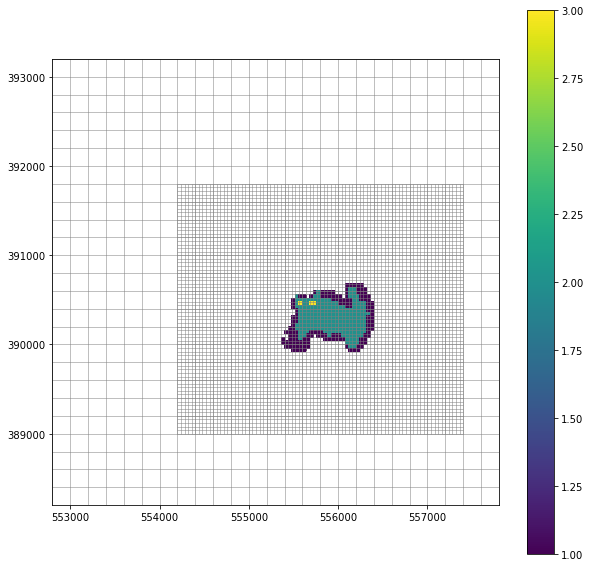

In [7]:
inset = m.inset['plsnt_lgr_inset']

l, r, b, t = m.modelgrid.extent
layer = 0

fig, ax = plt.subplots(figsize=(10, 10))
parent_mv = flopy.plot.PlotMapView(model=m, ax=ax, layer=layer)
inset_mv = flopy.plot.PlotMapView(model=inset, ax=ax, layer=layer)

vconn = inset.lak.connectiondata.array[inset.lak.connectiondata.array['claktype'] == 'vertical']
k, i, j = cellids_to_kij(vconn['cellid'])
lakeconnections = np.zeros((inset.nrow, inset.ncol))
lakeconnections[i, j] = np.array(k)
lakeconnections = np.ma.masked_array(lakeconnections, mask=lakeconnections == 0)
qmi = inset_mv.plot_array(lakeconnections)

#inset_mv.plot_bc('LAK', color='navy')
#parent_mv.plot_bc('WEL_0', color='red')

lcp = parent_mv.plot_grid(lw=0.5, ax=ax)
lci = inset_mv.plot_grid(lw=0.5)
ax.set_ylim(b, t)
ax.set_xlim(l, r)
ax.set_aspect(1)
plt.colorbar(qmi)

In [8]:
m.write_input()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing ims package ims_-1...
  writing mvr package pleasant_lgr.mvr...
  writing package pleasant_lgr.gwfgwf...
  writing model plsnt_lgr_parent...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package sto...
    writing package rcha...
    writing package oc...
    writing package sfr_0...
    writing package wel_0...
INFORMATION: maxbound in ('gwf6', 'wel', 'dimensions') changed to 2 based on size of stress_period_data
    writing package obs_0...
    writing package chd_0...
INFORMATION: maxbound in ('gwf6', 'chd', 'dimensions') changed to 235 based on size of stress_period_data
  writing model plsnt_lgr_inset...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package sto...
    writing package rcha...
    writing package oc...
    writing

In [9]:
# write the SFR package again using SFRmaker,
# because flopy doesn't check the packagedata against the idomain before writing
for model in m, m.inset['plsnt_lgr_inset']:
    if hasattr(model, 'sfr'):
        sfr_package_filename = os.path.join(model.model_ws, model.sfr.filename)
        model.sfrdata.write_package(sfr_package_filename,
                                    idomain=model.dis.idomain.array,
                                    version='mf6',
                                    options=['save_flows',
                                             'BUDGET FILEOUT {}.sfr.cbc'.format(model.name),
                                             'STAGE FILEOUT {}.sfr.stage.bin'.format(model.name),
                                             'mover'
                                               ]
                                    )

wrote ./plsnt_lgr_parent.sfr.obs
converting segment data to period data...
converting reach and segment data to package data...
wrote ./plsnt_lgr_parent.sfr
converting segment data to period data...
converting reach and segment data to package data...
wrote ./plsnt_lgr_inset.sfr


In [10]:
m.simulation.run_simulation()

FloPy is using the following  executable to run the model: /Users/aleaf/Documents/software/pymake_exes/mf6
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.1.0 12/12/2019

   MODFLOW 6 compiled Dec 13 2019 12:29:49 with IFORT compiler (ver. 19.0.5)

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the USGS nor the U.S. 
Government shall be held liable for any damages resulting from its 
authorized or unauthorized use. Also refer to 

(True, [])

In [11]:
os.getcwd()

'/Users/aleaf/Documents/GitHub/modflow-setup/examples/pleasant_lgr'

In [12]:
tmr_parent_headsobj = bf.HeadFile('../data/pleasant/pleasant.hds')
lgr_parent_headsobj = bf.HeadFile('plsnt_lgr_parent.hds')
lgr_inset_headsobj = bf.HeadFile('plsnt_lgr_inset.hds')

tmr_parent_hds = tmr_parent_headsobj.get_data(kstpkper=(4, 12))
lgr_parent_hds = lgr_parent_headsobj.get_data(kstpkper=(0, 12))
lgr_inset_hds = lgr_inset_headsobj.get_data(kstpkper=(0, 12))

lgr_parent_hds = np.ma.masked_array(lgr_parent_hds, mask=lgr_parent_hds == 1e30)
lgr_inset_hds = np.ma.masked_array(lgr_inset_hds, mask=lgr_inset_hds == 1e30)

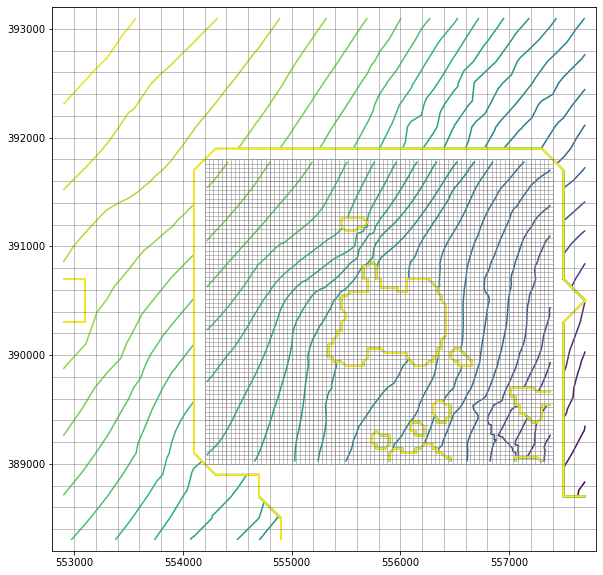

In [13]:
layer = 0

fig, ax = plt.subplots(figsize=(10, 10))
parent_mv = flopy.plot.PlotMapView(model=m, ax=ax, layer=layer)
inset_mv = flopy.plot.PlotMapView(model=inset, ax=ax, layer=layer)

pctr = parent_mv.contour_array(lgr_parent_hds, levels=np.arange(290, 315))
ictr = inset_mv.contour_array(lgr_inset_hds, levels=np.arange(290, 315))
#qmp = parent_mv.plot_array(lgr_parent_hds)
#qmi = inset_mv.plot_array(lgr_inset_hds)

lcp = parent_mv.plot_grid(lw=0.5, ax=ax)
lci = inset_mv.plot_grid(lw=0.5)
ax.set_ylim(b, t)
ax.set_xlim(l, r)
ax.set_aspect(1)
#plt.colorbar(qmp)

In [14]:
for model in m, inset:
    mfexport.export(model, model.modelgrid, output_path='postproc/{}/'.format(model.name))


dis package...
wrote postproc/plsnt_lgr_parent/rasters/thickness_lay0.tif
wrote postproc/plsnt_lgr_parent/rasters/thickness_lay1.tif
wrote postproc/plsnt_lgr_parent/rasters/thickness_lay2.tif
wrote postproc/plsnt_lgr_parent/rasters/thickness_lay3.tif
wrote postproc/plsnt_lgr_parent/rasters/thickness_lay4.tif
top:
wrote postproc/plsnt_lgr_parent/rasters/top.tif
botm:
wrote postproc/plsnt_lgr_parent/rasters/botm_lay0.tif
wrote postproc/plsnt_lgr_parent/rasters/botm_lay1.tif
wrote postproc/plsnt_lgr_parent/rasters/botm_lay2.tif
wrote postproc/plsnt_lgr_parent/rasters/botm_lay3.tif
wrote postproc/plsnt_lgr_parent/rasters/botm_lay4.tif
idomain:
wrote postproc/plsnt_lgr_parent/rasters/idomain_lay0.tif
wrote postproc/plsnt_lgr_parent/rasters/idomain_lay1.tif
wrote postproc/plsnt_lgr_parent/rasters/idomain_lay2.tif
wrote postproc/plsnt_lgr_parent/rasters/idomain_lay3.tif
wrote postproc/plsnt_lgr_parent/rasters/idomain_lay4.tif

ic package...
strt:
wrote postproc/plsnt_lgr_parent/rasters/strt_

In [15]:
for model in m, inset:
    mfexport.summarize(model, output_path='postproc/{}/'.format(model.name))

summarizing plsnt_lgr_parent input...
skipped, not implemented yet
summarizing plsnt_lgr_inset input...
skipped, not implemented yet
skipped, not implemented yet


In [16]:
outpath='postproc/{}/shps'.format(inset.name)
if not os.path.isdir(outpath):
    os.makedirs(outpath)
connectiondata = pd.DataFrame(inset.lak.connectiondata.array)
k, i, j = cellids_to_kij(connectiondata['cellid'])
connectiondata['k'] = k
connectiondata['i'] = i
connectiondata['j'] = j
connectiondata.drop('cellid', axis=1, inplace=True)
polygons = np.reshape(inset.modelgrid.polygons, (inset.modelgrid.nrow, inset.modelgrid.ncol))
connectiondata['geometry'] = polygons[i, j]
df2shp(connectiondata, os.path.join(outpath, 'lake_connections.shp'), epsg=3070)

creating shapely Polygons of grid cells...
finished in 0.05s

writing postproc/plsnt_lgr_inset/shps/lake_connections.shp...
